<a href="https://colab.research.google.com/github/morenov5/-Solar-Resource-Characterization---La-Guajira/blob/main/Solar_Resource_Characterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving POWER_Point_Monthly_20190101_20251231_011d55N_072d91W_LST.csv to POWER_Point_Monthly_20190101_20251231_011d55N_072d91W_LST (2).csv
📂 Archivo detectado: POWER_Point_Monthly_20190101_20251231_011d55N_072d91W_LST (2).csv
✅ Dataset transformado (index, columns): (84, 3)
PARAMETER   Clearness_Index     GHI   Temp
DATE                                      
2019-01-01             0.64  5.5207  25.78
2019-02-01             0.64  6.0847  26.21
2019-03-01             0.59  5.9923  26.42
2019-04-01             0.55  5.7972  27.82
2019-05-01             0.50  5.2802  27.87
2019-06-01             0.56  5.8231  28.15
2019-07-01             0.63  6.4850  28.09
2019-08-01             0.61  6.3149  28.75
2019-09-01             0.56  5.7372  28.65
2019-10-01             0.56  5.4077  27.79
2019-11-01             0.60  5.3030  27.61
2019-12-01             0.60  5.0654  27.68

Valores faltantes por columna después de limpiar:
PARAMETER
GHI                0
Temp               0
Clearness_Index    0


/tmp/ipython-input-3289040076.py:90: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_pivot[present] = data_pivot[present].fillna(method="ffill").fillna(method="bfill")
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.3404 - val_loss: 0.1485
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1411 - val_loss: 0.0384
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0424 - val_loss: 0.0740
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0545 - val_loss: 0.0562
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0358 - val_loss: 0.0365
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0407 - val_loss: 0.0362
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0325 - val_loss: 0.0361
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0298 - val_loss: 0.0404
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - val_loss: 0.0436
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0281 - val_loss: 0.0410
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0524 - val_loss: 0.0355
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0562 - val_loss: 0.0365
Epoch 13/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
📉 LSTM MSE (real units): 0.10105195197589584
📉 Naive Baseline MSE (real units): 0.2046757966666667
📉 Linear Regression MSE (real units): 0.17493651974523078

📊 Comparación de Modelos (MSE en kWh/m²/día)
LSTM: 0.1011
Naive: 0.2047
Linear Regression: 0.1749


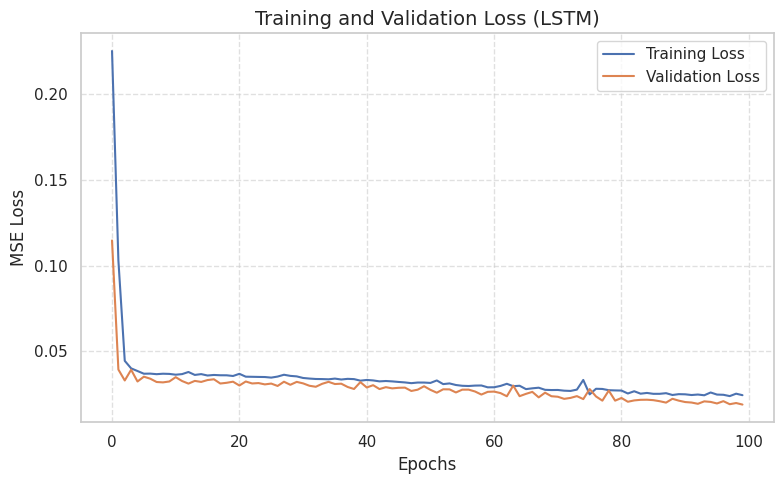

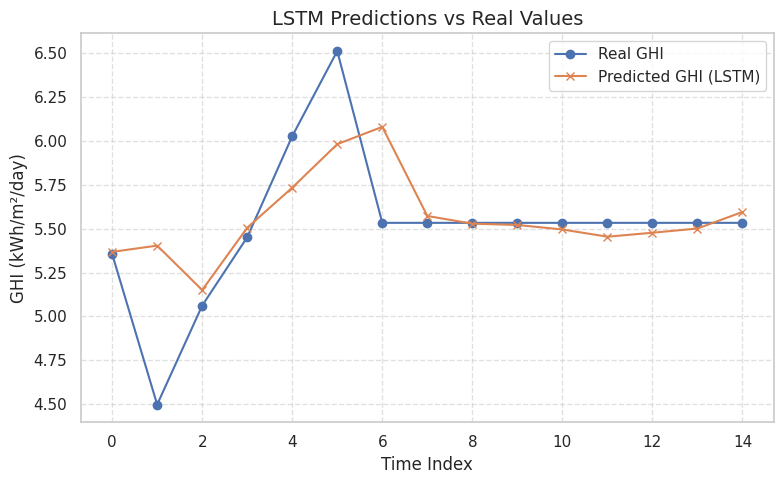

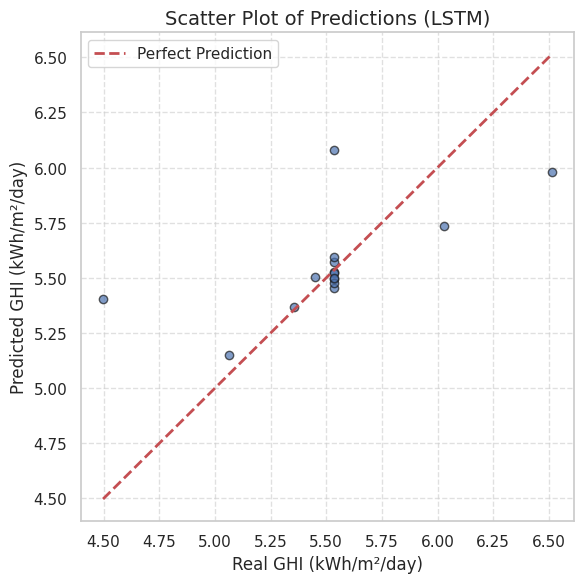

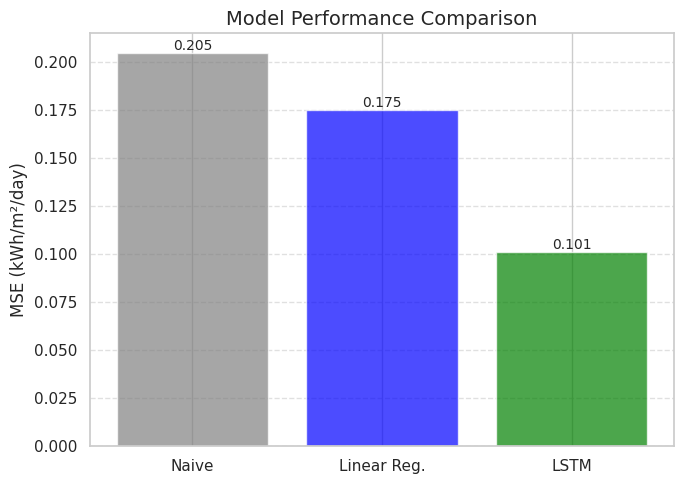

In [ ]:
!pip install -q tensorflow scikit-learn pandas matplotlib

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files


uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print(f"Archivo detectado: {file_name}")


text = uploaded[file_name].decode("utf-8", errors="ignore").splitlines()
start_idx = next((i for i, line in enumerate(text) if line.startswith("PARAMETER")), None)
if start_idx is None:
    raise ValueError("No se encontró la línea que comienza con 'PARAMETER' en el CSV.")

csv_text = "\n".join(text[start_idx:])
data = pd.read_csv(io.StringIO(csv_text))


if "ANN" in data.columns:
    data = data.drop(columns=["ANN"])


data_long = data.melt(id_vars=["PARAMETER", "YEAR"], var_name="MONTH", value_name="VALUE")


month_map = {"JAN":1,"FEB":2,"MAR":3,"APR":4,"MAY":5,"JUN":6,
             "JUL":7,"AUG":8,"SEP":9,"OCT":10,"NOV":11,"DEC":12}
data_long = data_long[data_long["MONTH"].isin(month_map.keys())]
data_long["MONTH"] = data_long["MONTH"].map(month_map)


data_long["DATE"] = pd.to_datetime(dict(year=data_long["YEAR"].astype(int),
                                        month=data_long["MONTH"].astype(int),
                                        day=1))


data_pivot = data_long.pivot(index="DATE", columns="PARAMETER", values="VALUE").reset_index()


data_pivot = data_pivot.replace(-999.0, np.nan)


col_map = {"ALLSKY_KT":"Clearness_Index", "ALLSKY_SFC_SW_DWN":"GHI", "T2M":"Temp"}
data_pivot = data_pivot.rename(columns=col_map)


data_pivot = data_pivot.set_index("DATE").sort_index()

print("Dataset transformado (index, columns):", data_pivot.shape)
print(data_pivot.head(12))


expected = ["GHI","Temp","Clearness_Index"]
present = [c for c in expected if c in data_pivot.columns]
if not present:
    raise ValueError(f"No se encontraron parámetros esperados. Columnas presentes: {data_pivot.columns.tolist()}")


for c in present:
    data_pivot[c] = pd.to_numeric(data_pivot[c], errors="coerce")

data_pivot[present] = data_pivot[present].interpolate(method="time", limit_direction="both")
data_pivot[present] = data_pivot[present].fillna(method="ffill").fillna(method="bfill")


print("\nValores faltantes por columna después de limpiar:")
print(data_pivot[present].isna().sum())
print(data_pivot[present].head(12))


scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_pivot[["GHI","Temp"]])
scaled_df = pd.DataFrame(scaled, index=data_pivot.index, columns=["GHI","Temp"])


def create_sequences(values, seq_len=12):
    X, y = [], []
    for i in range(len(values) - seq_len):
        X.append(values[i:i+seq_len])
        y.append(values[i+seq_len])
    return np.array(X), np.array(y)

ghi_scaled = scaled_df["GHI"].values
seq_len = 12

if len(ghi_scaled) <= seq_len + 1:
    raise ValueError("No hay suficientes datos para generar secuencias LSTM. Necesitas > seq_len+1 registros.")

X, y = create_sequences(ghi_scaled, seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))


split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]


model = Sequential([
    LSTM(64, input_shape=(seq_len,1), return_sequences=False),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred)
print(f"📉 LSTM MSE: {mse_lstm:.6f}")


X_lr = np.arange(len(ghi_scaled)).reshape(-1,1)
y_lr = ghi_scaled
split_lr = int(0.8 * len(X_lr))
reg = LinearRegression().fit(X_lr[:split_lr], y_lr[:split_lr])
y_lr_pred = reg.predict(X_lr[split_lr:])
mse_lr = mean_squared_error(y_lr[split_lr:], y_lr_pred)

baseline = min(mse_lstm, mse_lr)
worst    = max(mse_lstm, mse_lr)


improvement = ((worst - baseline) / worst) * 100


print(f"Linear Regression MSE: {mse_lr:.6f}")
print(f"Accuracy Improvement: {improvement:.2f} %")


from sklearn.metrics import mean_squared_error


def create_sequences(values, seq_len=12):
    X, y = [], []
    for i in range(len(values)-seq_len):
        X.append(values[i:i+seq_len])
        y.append(values[i+seq_len])
    return np.array(X), np.array(y)


ghi_scaled = scaled_df["GHI"].values
seq_len = 12
X, y = create_sequences(ghi_scaled, seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))

split = int(0.8 * len(X))
X_train, y_train, X_test, y_test = X[:split], y[:split], X[split:], y[split:]

model = Sequential([
    LSTM(16, input_shape=(seq_len,1), return_sequences=False),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=4,
    validation_split=0.2, verbose=0
)


y_pred = model.predict(X_test)


ghi_min, ghi_max = scaler.data_min_[0], scaler.data_max_[0]
y_test_real = y_test * (ghi_max - ghi_min) + ghi_min
y_pred_real = y_pred.flatten() * (ghi_max - ghi_min) + ghi_min

mse_lstm = mean_squared_error(y_test_real, y_pred_real)
print("LSTM MSE (real units):", mse_lstm)


y_naive = ghi_scaled[seq_len-1:-1]
y_true = ghi_scaled[seq_len:]
mse_naive = mean_squared_error(y_true, y_naive)


y_true_real = y_true * (ghi_max - ghi_min) + ghi_min
y_naive_real = y_naive * (ghi_max - ghi_min) + ghi_min
mse_naive_real = mean_squared_error(y_true_real, y_naive_real)

print("Naive Baseline MSE (real units):", mse_naive_real)


X_lr = np.arange(len(ghi_scaled)).reshape(-1,1)
y_lr = ghi_scaled
split = int(0.8*len(X_lr))
reg = LinearRegression().fit(X_lr[:split], y_lr[:split])
y_lr_pred = reg.predict(X_lr[split:])

y_lr_real = y_lr[split:] * (ghi_max - ghi_min) + ghi_min
y_lr_pred_real = y_lr_pred * (ghi_max - ghi_min) + ghi_min
mse_lr_real = mean_squared_error(y_lr_real, y_lr_pred_real)

print("Linear Regression MSE (real units):", mse_lr_real)


print("\n Comparación de Modelos (MSE en kWh/m²/día)")
print(f"LSTM: {mse_lstm:.4f}")
print(f"Naive: {mse_naive_real:.4f}")
print(f"Linear Regression: {mse_lr_real:.4f}")


plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.title('Training and Validation Loss (LSTM)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(y_test_real, label='Real GHI', marker='o')
plt.plot(y_pred_real, label='Predicted GHI (LSTM)', marker='x')
plt.xlabel('Time Index', fontsize=12)
plt.ylabel('GHI (kWh/m²/day)', fontsize=12)
plt.title('LSTM Predictions vs Real Values', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_pred_real, alpha=0.7, edgecolors='k')
plt.plot([min(y_test_real), max(y_test_real)],
         [min(y_test_real), max(y_test_real)],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Real GHI (kWh/m²/day)', fontsize=12)
plt.ylabel('Predicted GHI (kWh/m²/day)', fontsize=12)
plt.title('Scatter Plot of Predictions (LSTM)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


